In [1]:
cd matlab
pwd
clear all
imatlab_export_fig('print-svg')  % Static svg figures.
format compact

ans =
    '/Users/eechris/code/src/github.com/cpjobling/eglm03-textbook/05/2/matlab'


In [2]:
nG = 1; dG = [1, 1, 0];
G = tf(nG,dG);
H = tf(1,1);
Go = G; 

In [3]:
w = logspace(-2,1);

In [4]:
[m0,p0] = bode(Go,w);

In [5]:
m0dB = 20*log10(m0);
m0dB = reshape(m0dB,length(w),1);
p0 = reshape(p0,length(w),1);

In [6]:
[Ao,Bo,Co,Do]=ssdata(Go);

In [7]:
am0dB = asymp(Ao,Bo,Co,Do,w);

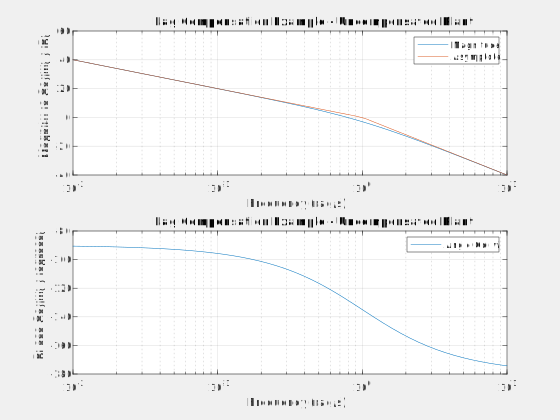

In [8]:
clf
subplot(211)
semilogx(w,m0dB,w,am0dB),...
   axis([0.01, 10, -40, 60]),...
   title('Lag Compensation Example - Uncompensated Plant'),...
   legend('Magnitude','Asymptote'),ylabel('Magnitude Go(jw) (dB)'),xlabel('Frequency (rad/s)'),...
   grid
subplot(212)
semilogx(w,p0),...
   title('Lag Compensation Example - Uncompensated Plant'),...
   legend('Angle Go(jw)'),ylabel('Phase Go(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid


Deg =


  5 s + 5


  -------


  3 s + 1


Continuous-time transfer function.



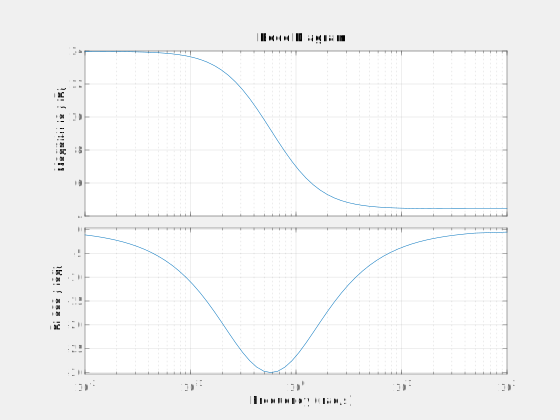

In [9]:
Kc = 5; alpha = 3; T = 1;
Deg = tf(Kc*[T, 1],[alpha*T, 1])  
clf
bode(Deg)
grid

In [10]:
Kv = 10; w1 = 1; % rad/s
alpha = Kv; % low frequency gain required
Kc = alpha; % compensator gain
wz = w1/10; % 1 decade below gain cut-off
T = 1/wz;   % zero value
D = tf(Kc*[T, 1],[alpha*T, 1])


D =


  100 s + 10


  ----------


  100 s + 1


Continuous-time transfer function.



In [11]:
DGo = series(D,Go);
[m1,p1] = bode(DGo,w);
m1dB = 20*log10(m1);
m1dB = reshape(m1dB,length(w),1);
p1 = reshape(p1,length(w),1);

In [12]:
[A1,B1,C1,D1]=ssdata(DGo);
am1dB = asymp(A1,B1,C1,D1,w);

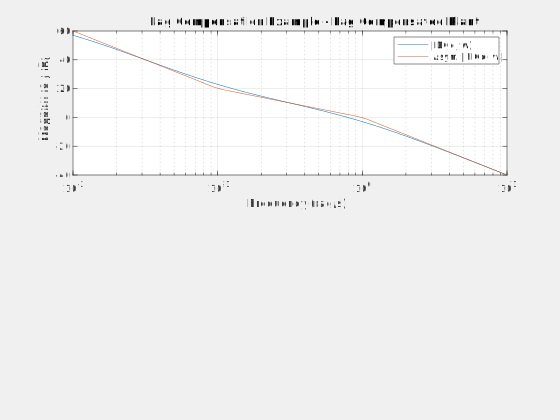

In [13]:
clf
subplot(211)
semilogx(w,m1dB,w,am1dB),...
   axis([0.01, 10, -40, 60]),...
   title('Lag Compensation Example - Lag Compensated Plant'),...
   legend('|DGo(jw)|','Asym. |DGo(jw)|'),...
   ylabel('Magnitude (dB)'),xlabel('Frequency (rad/s)'),...
   grid

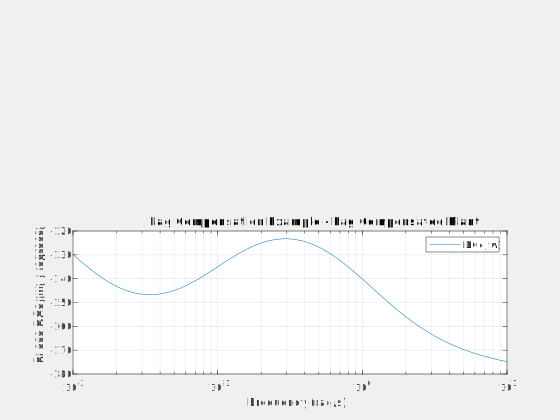

In [14]:
subplot(212)
semilogx(w,p1),...
   title('Lag Compensation Example - Lag Compensated Plant'),...
   legend('DGo(jw)'),ylabel('Phase DGo(jw) (degrees)'),xlabel('Frequency (rad/s)'),...
   grid

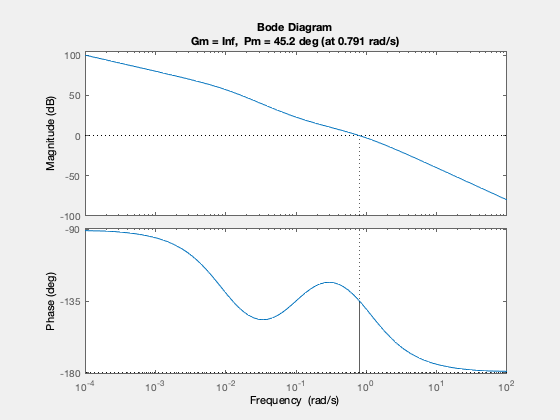

In [15]:
clf
margin(DGo)  

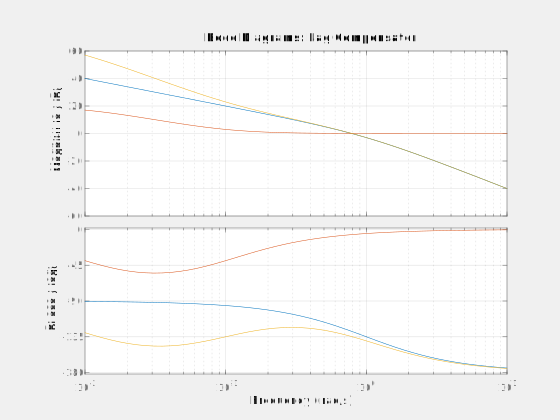

In [16]:
% Bode
%  blue - Uncompensated Go(jw)
%  green - Lag Compensator D(jw)
%  red - Lag compensated DGo(jw)
bode(Go,D,DGo,w),...
   title('Bode Diagrams: Lag Compensator'),...
   grid

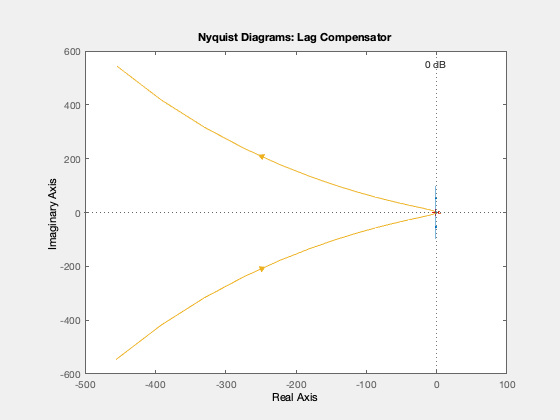

In [17]:
% Nyquist
% blue - Uncompensated Go(jw)
% green - Lag Compensator D(jw)
% red - Lag compensated DGo(jw)
nyquist(Go,D,DGo,w)
   title('Nyquist Diagrams: Lag Compensator'),...
   grid

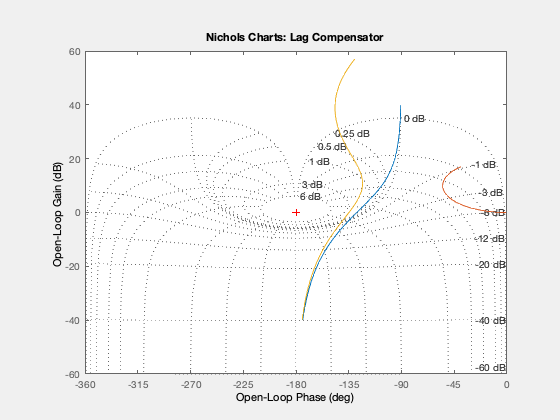

In [18]:
% Nichols
% blue - Uncompensated Go(jw)
% green - Lag Compensator D(jw)
% red - Lag compensated DGo(jw)
nichols(Go,D,DGo,w)
   title('Nichols Charts: Lag Compensator'),...
   grid

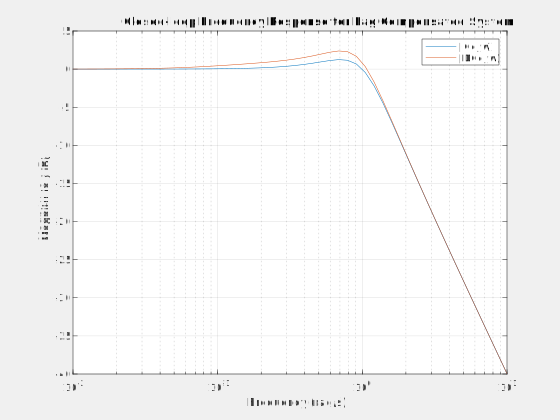

In [19]:
Gc0 = feedback(Go,1);
Gc1 = feedback(DGo,1);
[mc0,pc0]=bode(Gc0,w);
[mc1,pc1]=bode(Gc1,w);
mc0 = 20.*log10(reshape(mc0,length(w),1));
mc1 = 20.*log10(reshape(mc1,length(w),1));
semilogx(w,mc0,w,mc1),...
   grid,...
   title('Closed-loop Frequency Response for Lag Compensated System'),...
   legend('|Go(jw)|','|DGo(jw)|'),...
   xlabel('Frequency (rad/s)'),...
   ylabel('Magnitude (dB)')

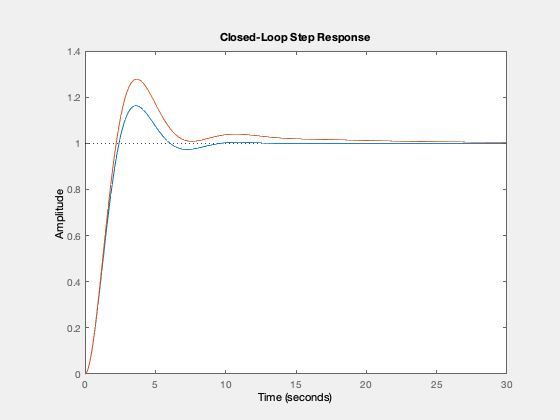

In [20]:
% Blue - uncompensated
% Green - Lag compensated
clf
step(Gc0,Gc1),title('Closed-Loop Step Response')

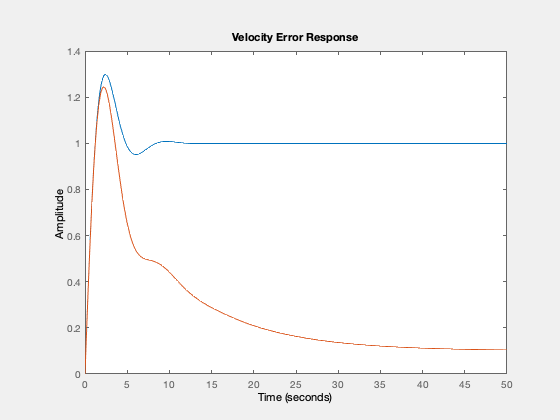

In [21]:
integ=tf(1,[1 0]);
re0 = integ*(1/(1 + Go));
re1 = integ*(1/(1 +DGo));
clf
step(re0,re1), title('Velocity Error Response')